In [2]:
import matplotlib.pyplot as plt 
from os import walk
import numpy as np
import pandas as pd

In [9]:
def log_file_complexe(All_algo =["decpomdp"],All_horizon=[3],All_filename=["mabc"],All_discount=[1.000000],All_upper_bound_init=["MaxInitializer"],All_lower_bound_init=["MinInitializer"],All_upper_bound=[""],All_lower_bound=[""],All_truncation =[2],All_sawtooth_type_of_resolution = ["BigM"],All_sawtooth_BigM_value = [100]):
    
    all_filename = []

    for algo in All_algo :
        for horizon in All_horizon :
            for discount in All_discount :
                discount = f"{discount:.6f}"
                for file in All_filename :
                    for upper_bound in All_upper_bound :
                        for lower_bound in All_lower_bound :
                            for upper_bound_init in All_upper_bound_init :
                                for lower_bound_init in All_lower_bound_init :
                                    for truncation in All_truncation :
                                        for sawtooth_type_of_resolution in All_sawtooth_type_of_resolution :
                                            for BigM_value in All_sawtooth_BigM_value :
                                                all_filename.append("Resultat/"+file+"#"+str(horizon)+"#"+algo+"#"+discount+"#"+upper_bound_init+"#"+lower_bound_init+"#"+upper_bound+"#"+lower_bound+"#"+str(truncation)+"#"+sawtooth_type_of_resolution+"#"+str(BigM_value)+"#"+str(0)+".csv")

    return all_filename

def print_database(filename) :
    for filename in all_filename :
        
        print(filename)
        df = pd.read_csv(filename)
        print(df)
"""       
def found_legend(all_filename):
    
    legend_name = []
    
    variable_algo = False    
    variable_horizon = False
    variable_filename = False
    variable_discount = False
    variable_upper_bound = False
    variable_lower_bound = False

    search_non_variable_attribut = []
    all_attribut = []
    
    for filename in all_filename :
        filename = filename.replace(".csv","")
        filename = filename.split("#")
        
        all_attribut.append(filename)
        
        if len(search_non_variable_attribut) ==0 : 
            for i in filename :
                search_non_variable_attribut.append(i)
        else :
            for i in range(len(filename)) :
                if filename[i] not in search_non_variable_attribut[i] :
                    if i == 0 :
                        variable_filename = True
                    elif i == 1 :
                        variable_horizon = True
                    elif i == 2 :
                        variable_algo = True                        
                    elif i == 3 :
                        variable_discount = True    
                    elif i == 4 :
                        variable_upper_bound = True            
                    elif i == 5 :
                        variable_lower_bound = True

    for file in all_attribut : 
        tempo = []
        
        if variable_filename :
            tempo.append(file[0])
        if variable_horizon :
            tempo.append(file[1])
        if variable_algo :
            tempo.append(file[2])                       
        if variable_discount :
            tempo.append(file[3])   
        if variable_upper_bound :
            tempo.append(file[4])            
        if variable_lower_bound :
            tempo.append(file[5])
        legend_name.append("#".join(tempo))
        
    return legend_name
                        
def graph(all_filename,xaxis = "Time",yaxis="Value",ylim=None, xlim = None):
    legend = found_legend(all_filename)
    
    for i in range(len(all_filename)) :

        df = pd.read_csv(all_filename[i])
        col_names = list(df.columns)
        
        plt.plot(df[xaxis],df[yaxis],label = legend[i])        

    plt.legend()
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    
    if ylim != None :
        plt.ylim(ylim)
    if xlim != None :
        plt.xlim(xlim)
    plt.show()
"""

def graphLowerAndUpperBound(filename_decpomdp,filename_extensive_decpomdp,xaxis = "Real_Time",ylim=None, xlim = None):
    

    df = pd.read_csv(filename_decpomdp)
    plt.plot(df[xaxis],df["Value_LB"],"r--",label = "Lower_bound_DecPOMDP")
    plt.plot(df[xaxis],df["Value_UB"],"r--",label = "Upper_bound_DecPOMDP")    
    
    df = pd.read_csv(filename_extensive_decpomdp)
    plt.plot(df[xaxis],df["Value_LB"],"b--",label = "Lower_bound_ExtensiveDecPOMDP")
    plt.plot(df[xaxis],df["Value_UB"],"b--",label = "Upper_bound_ExtensiveDecPOMDP")   

    plt.legend()
    plt.xlabel(xaxis)
    plt.ylabel("Result")
    
    if ylim != None :
        plt.ylim(ylim)
    if xlim != None :
        plt.xlim(xlim)
    plt.show()


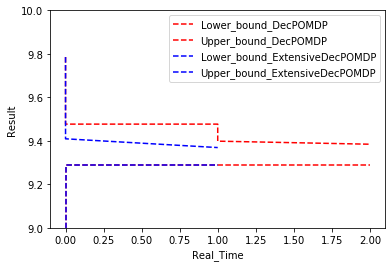

In [10]:
#Comparaison entre les différentes bornes possibles pour le cas Extensive et MABC
filename_decpomdp = log_file_complexe(All_algo =["decpomdp"],All_horizon=[10],All_filename=["mabc"],
                                 All_discount=[1.000000],All_upper_bound_init=["MdpHsviInitializer"],
                                 All_lower_bound_init=["MinInitializer"],All_upper_bound=["sawtooth_lp"],
                                 All_lower_bound=["maxplan_lp"],All_truncation=[2], All_sawtooth_BigM_value=[100],
                                All_sawtooth_type_of_resolution=["IloIfThen"])

filename_extensive_decpomdp = log_file_complexe(All_algo =["extensive-decpomdp"],All_horizon=[10],All_filename=["mabc"],
                                 All_discount=[1.000000],All_upper_bound_init=["MdpHsviInitializer"],
                                 All_lower_bound_init=["MinInitializer"],All_upper_bound=["sawtooth_lp"],
                                 All_lower_bound=["maxplan_serial"],All_truncation=[2], All_sawtooth_BigM_value=[100],
                                All_sawtooth_type_of_resolution=["IloIfThen"])

graphLowerAndUpperBound(filename_decpomdp[0],filename_extensive_decpomdp[0],xaxis="Real_Time", ylim = [9,10])

#graph(all_filename,yaxis="Value_UB")
#graph(all_filename,yaxis="Value_LB")

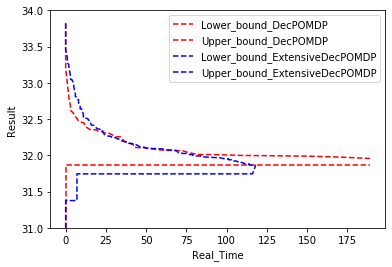

In [6]:
#Comparaison entre les différentes bornes possibles pour le cas Extensive et MABC
filename_decpomdp = log_file_complexe(All_algo =["decpomdp"],All_horizon=[10],All_filename=["recycling"],
                                 All_discount=[1.000000],All_upper_bound_init=["MdpHsviInitializer"],
                                 All_lower_bound_init=["MinInitializer"],All_upper_bound=["sawtooth_lp"],
                                 All_lower_bound=["maxplan_lp"],All_truncation=[2], All_sawtooth_BigM_value=[100],
                                All_sawtooth_type_of_resolution=["IloIfThen"])

filename_extensive_decpomdp = log_file_complexe(All_algo =["extensive-decpomdp"],All_horizon=[10],All_filename=["recycling"],
                                 All_discount=[1.000000],All_upper_bound_init=["MdpHsviInitializer"],
                                 All_lower_bound_init=["MinInitializer"],All_upper_bound=["sawtooth_lp"],
                                 All_lower_bound=["maxplan_serial"],All_truncation=[2], All_sawtooth_BigM_value=[100],
                                All_sawtooth_type_of_resolution=["IloIfThen"])

graphLowerAndUpperBound(filename_decpomdp[0],filename_extensive_decpomdp[0],xaxis="_Time", ylim =[31,34])

No handles with labels found to put in legend.


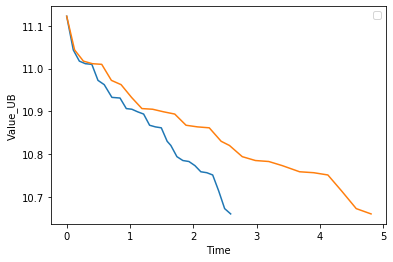

No handles with labels found to put in legend.


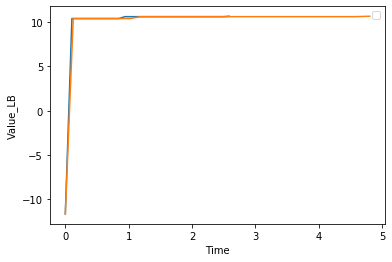

In [30]:
#Comparaison entre les différentes bornes possibles pour le cas Extensive et Recylcling
all_filename = log_file_complexe(All_algo =["extensive-decpomdp"],All_horizon=[3],All_filename=["recycling"],
                                 All_discount=[1.000000],All_upper_bound_init=["MdpHsviInitializer"],
                                 All_lower_bound_init=["MinInitializer"],All_upper_bound=["","sawtooth"])
graph(all_filename,yaxis="Value_UB")
graph(all_filename,yaxis="Value_LB")

#graph(all_filename,yaxis="Value_UB",xlim=[-2,20])

In [15]:
#Comparaison entre les différentes bornes possibles pour le cas Occupancy et MABC
all_filename = log_file_complexe(All_algo =["Occupancy"],All_horizon=[3],All_filename=["mabc"],
                                 All_discount=[1.000000],All_upper_bound=["MaxInitializer","MdpHsviInitializer"],
                                 All_lower_bound=["MinInitializer"])
graph(all_filename,yaxis="Value_UB")
graph(all_filename,yaxis="Value_LB")

FileNotFoundError: [Errno 2] File Resultat/mabc#3#Occupancy#1.000000#MaxInitializer#MinInitializer.csv does not exist: 'Resultat/mabc#3#Occupancy#1.000000#MaxInitializer#MinInitializer.csv'

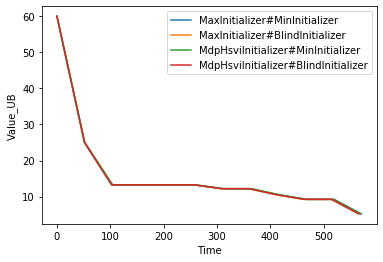

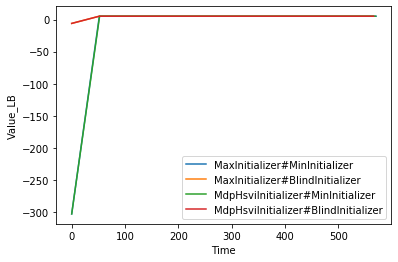

In [131]:
#Comparaison entre les différentes bornes possibles pour le cas Occupancy et MABC
all_filename = log_file_complexe(All_algo =["Occupancy"],All_horizon=[3],All_filename=["tiger"],
                                 All_discount=[1.000000],All_upper_bound=["MaxInitializer","MdpHsviInitializer"],
                                 All_lower_bound=["MinInitializer","BlindInitializer"])
graph(all_filename,yaxis="Value_UB")
graph(all_filename,yaxis="Value_LB")

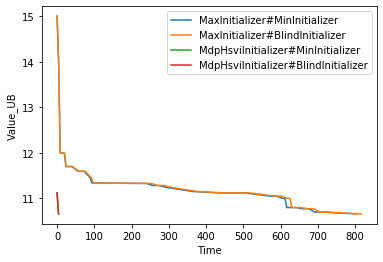

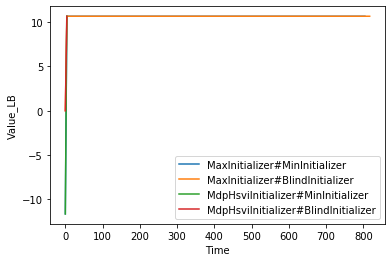

In [132]:
#Comparaison entre les différentes bornes possibles pour le cas Occupancy et recycling
all_filename = log_file_complexe(All_algo =["Occupancy"],All_horizon=[3],All_filename=["recycling"],
                                 All_discount=[1.000000],All_upper_bound=["MaxInitializer","MdpHsviInitializer"],
                                 All_lower_bound=["MinInitializer","BlindInitializer"])
graph(all_filename,yaxis="Value_UB")
graph(all_filename,yaxis="Value_LB")